<a href="https://colab.research.google.com/github/viktoruebelhart/cataract/blob/main/cataract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Automated Cataract Classification (Immature and Mature) Using Supervised Learning

This project aims to develop a predictive model to classify cataracts into two categories: immature and mature. Using supervised learning, the model will be trained on a database of images of eyes with cataracts, focused on differentiating these two stages of the disease. The system interface will allow users to upload a photo of the eye, and the model will return an accurate classification indicating whether the cataract is in the immature or mature stage.

Technologies:

Python

TensorFlow / Keras

Image Processing

Supervised Learning

Objective:
The project aims to provide a reliable tool that facilitates the classification of cataracts in the immature and mature stages, helping ophthalmologists quickly identify the condition and guide appropriate treatment.

In [1]:
url = '/content/drive/MyDrive/Alura/catarata'

In [2]:
import pathlib

In [3]:
data_dir = pathlib.Path(url)

In [4]:
len(list(data_dir.glob('*/*.jpg')))

410

In [5]:
subfolders = [f.name for f in data_dir.iterdir() if f.is_dir()]
subfolders

['immature', 'mature']

In [6]:
import PIL

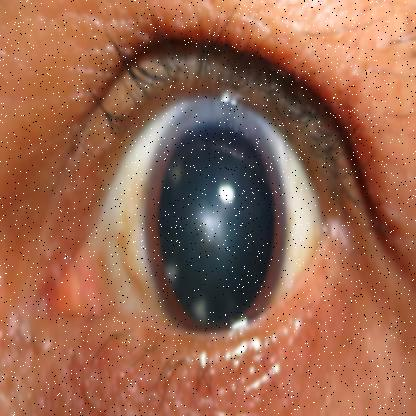

In [7]:
immature = list(data_dir.glob('immature/*'))
PIL.Image.open(str(immature[0]))

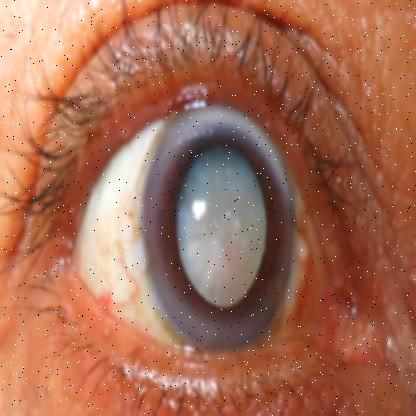

In [8]:
mature = list(data_dir.glob('mature/*'))
PIL.Image.open(str(mature[0]))

In [9]:
import numpy as np

In [10]:
for subfolder in subfolders:
  path = data_dir / subfolder
  images = list(path.glob('*.jpg'))
  print(f'Class {subfolder} found {len(images)} images')

  if images:
    img = PIL.Image.open(str(images[0]))
    img_array = np.array(img)
    print(f"Dimension '{subfolder}': {img_array.shape}")

Class immature found 214 images
Dimension 'immature': (416, 416, 3)
Class mature found 196 images
Dimension 'mature': (416, 416, 3)


In [11]:
import tensorflow as tf

In [12]:
batch_size = 64
img_height = 416
img_width = 416

In [13]:
train = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'training',
    seed = 568,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 410 files belonging to 2 classes.
Using 328 files for training.


In [14]:
validation = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'validation',
    seed = 568,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 410 files belonging to 2 classes.
Using 82 files for validation.


In [15]:
train.class_names

['immature', 'mature']

In [16]:
tf.random.set_seed(424242)

In [17]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input((416, 416, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [18]:
modelo.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [19]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [20]:
epochs = 10
history = modelo.fit(
    train,
    validation_data = validation,
    epochs = epochs
)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 164s 26s/step - accuracy: 0.4946 - loss: 63.8227 - val_accuracy: 0.5244 - val_loss: 38.0397
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 40s 210ms/step - accuracy: 0.5695 - loss: 27.3081 - val_accuracy: 0.5244 - val_loss: 19.5497
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 337ms/step - accuracy: 0.6342 - loss: 13.6604 - val_accuracy: 0.8902 - val_loss: 3.8934
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 373ms/step - accuracy: 0.8377 - loss: 6.5275 - val_accuracy: 0.8780 - val_loss: 3.9508
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 215ms/step - accuracy: 0.8596 - loss: 5.7848 - val_accuracy: 0.8902 - val_loss: 3.3647
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - accuracy: 0.8723 - loss: 3.3335 - val_accuracy: 0.9024 - val_loss: 2.3481
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - accuracy: 0.8996 - loss: 2.0334 - val_accuracy: 0.8171 - val_loss: 6.4034
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step - accuracy: 0.8189 - loss: 3.9138 - val_accuracy: 0.6463 - val

In [21]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 416, 416, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 519168)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      66,453,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 199,385,861 (760.60 MB)

 Trainable params: 66,461,953 (253.53 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 132,923,908 (507.06 MB)

In [22]:
import matplotlib.pyplot as plt

In [23]:
def plot_results(history, epochs):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)
  plt.figure(figsize = (12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, 'r', label = 'Training Accuracy')
  plt.plot(epochs_range, val_acc, 'b', label = 'Validation Accuracy')
  plt.legend(loc = 'lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, 'r', label = 'Training Loss')
  plt.plot(epochs_range, val_loss, 'b', label = 'Validation Loss')
  plt.legend(loc = 'upper right')
  plt.title('Training and Validation Loss')
  plt.show()

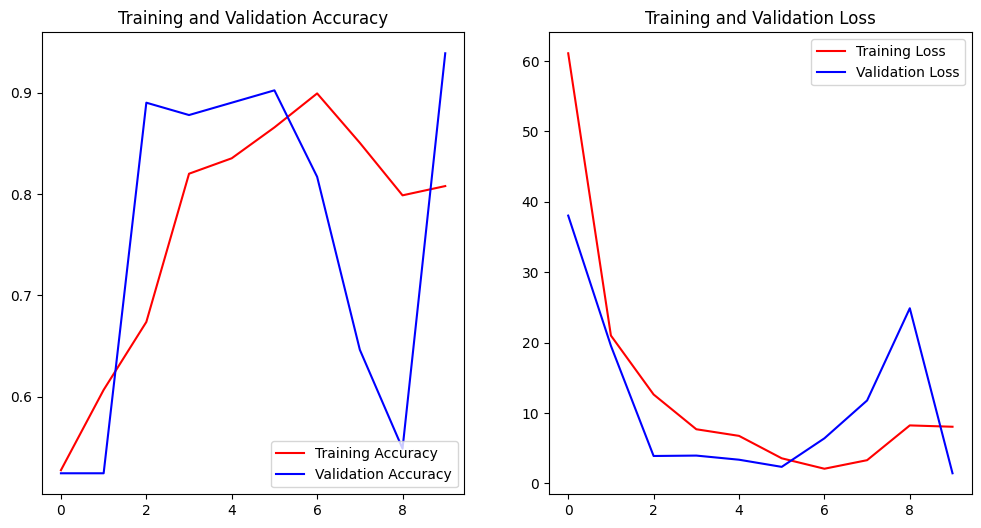

In [24]:
plot_results(history, epochs)

In [25]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input((416, 416, 3)),
    tf.keras.layers.Rescaling(1./255),

    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

modelo.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [26]:
epochs = 10
history = modelo.fit(
    train,
    validation_data = validation,
    epochs = epochs
)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.5368 - loss: 5.9206 - val_accuracy: 0.5366 - val_loss: 0.6835
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 245ms/step - accuracy: 0.6094 - loss: 0.6277 - val_accuracy: 0.7317 - val_loss: 0.5181
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step - accuracy: 0.7887 - loss: 0.4373 - val_accuracy: 0.8537 - val_loss: 0.3580
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 265ms/step - accuracy: 0.9297 - loss: 0.2475 - val_accuracy: 0.9146 - val_loss: 0.2854
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 251ms/step - accuracy: 0.9560 - loss: 0.1362 - val_accuracy: 0.9146 - val_loss: 0.1899
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 400ms/step - accuracy: 1.0000 - loss: 0.0532 - val_accuracy: 0.8537 - val_loss: 0.2968
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 260ms/step - accuracy: 0.9765 - loss: 0.0605 - val_accuracy: 0.9268 - val_loss: 0.1262
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 255ms/step - accuracy: 1.0000 - loss: 0.0151 - val_accuracy: 0.9390 - val_loss: 

In [27]:
def plot_results(history, epochs):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)
  plt.figure(figsize = (12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, 'r', label = 'Training Accuracy')
  plt.plot(epochs_range, val_acc, 'b', label = 'Validation Accuracy')
  plt.legend(loc = 'lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, 'r', label = 'Training Loss')
  plt.plot(epochs_range, val_loss, 'b', label = 'Validation Loss')
  plt.legend(loc = 'upper right')
  plt.title('Training and Validation Loss')
  plt.show()

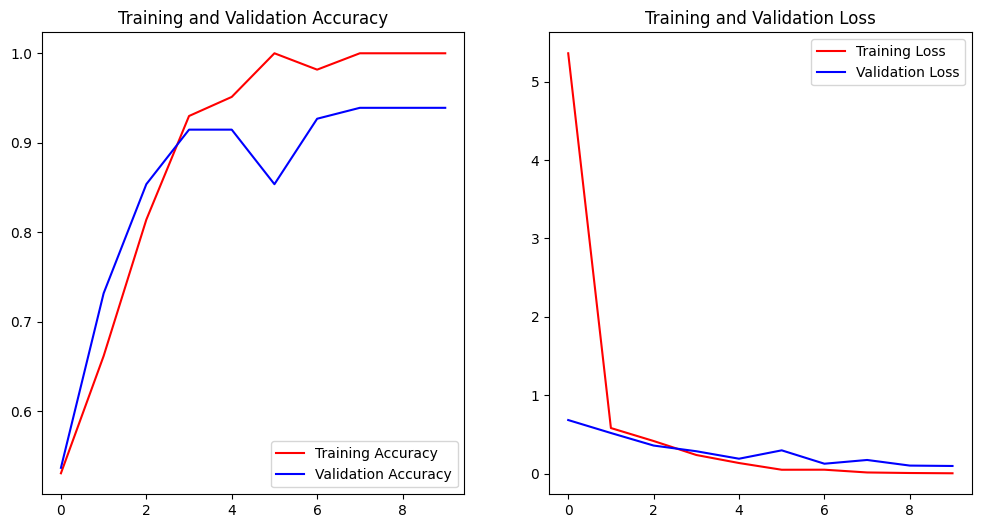

In [28]:
plot_results(history, epochs)

In [29]:
input_shape = (416, 416, 3)

In [30]:
model_base = tf.keras.applications.InceptionV3(input_shape = input_shape, include_top = False, weights = 'imagenet')

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [31]:
model_base.trainable = False

In [32]:
model_base.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 416, 416, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 207, 207, 32)   │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 207, 207, 32)   │             96 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 207, 207, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 205, 205, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 205, 205, 32)   │             96 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 205, 205, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 205, 205, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 205, 205, 64)   │            192 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 205, 205, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 102, 102, 64)   │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 102, 102, 80)   │          5,120 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 102, 102, 80)   │            240 │ conv2d_5[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 102, 102, 80)   │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 100, 100, 192)  │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 100, 100, 192)  │            576 │ conv2d_6[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [33]:
rescale = tf.keras.layers.Rescaling((1./255))
train = train.map(lambda x, y: (rescale(x), y))
validation = validation.map(lambda x, y: (rescale(x), y))

In [34]:
last_layer = model_base.get_layer('mixed7')
print('last layer output shape:', last_layer.output.shape)
last_exiting = last_layer.output

last layer output shape: (None, 24, 24, 768)


In [35]:
x = tf.keras.layers.Flatten()(last_exiting)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(4, activation = 'softmax')(x)

model = tf.keras.models.Model(model_base.input, x)

In [36]:
model.compile(tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [37]:
epochs = 10
history = model.fit(
    train,
    validation_data = validation,
    epochs = epochs,

)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 65s 7s/step - accuracy: 0.3680 - loss: 32.0808 - val_accuracy: 0.5244 - val_loss: 46.2562
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 473ms/step - accuracy: 0.7270 - loss: 18.4931 - val_accuracy: 0.8415 - val_loss: 7.0744
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 603ms/step - accuracy: 0.9559 - loss: 1.3367 - val_accuracy: 0.7927 - val_loss: 8.8053
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 528ms/step - accuracy: 0.9338 - loss: 3.5577 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 484ms/step - accuracy: 0.9962 - loss: 0.0497 - val_accuracy: 0.9024 - val_loss: 3.2965
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 604ms/step - accuracy: 0.9626 - loss: 1.0170 - val_accuracy: 0.9756 - val_loss: 0.4129
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 482ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 490ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1

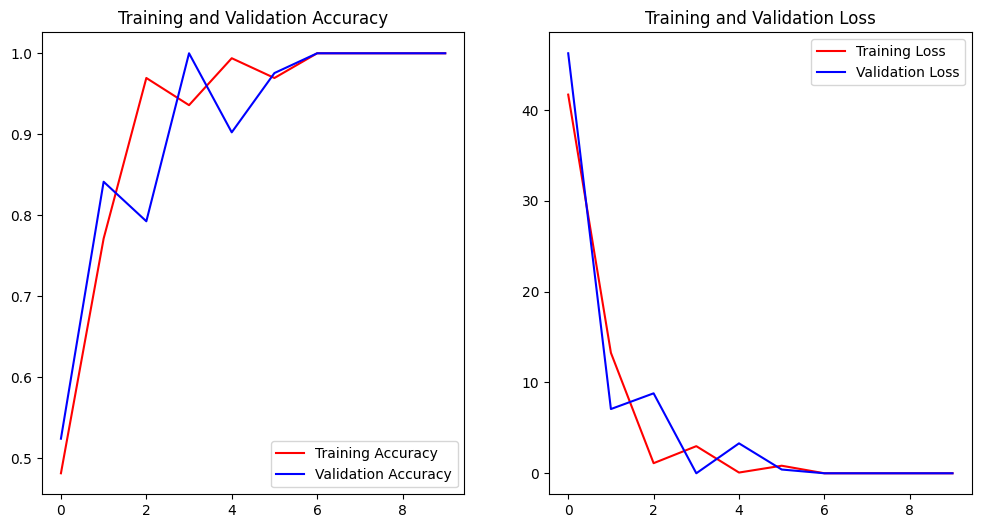

In [38]:
plot_results(history, epochs)